In [1]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [305]:
# =========== part 1 : load data =================
data = loadmat('ex5data1.mat')
X = data['X'].round(4); y = data['y'].round(4)
X = np.insert(X, 0, 1, axis=1)
Xval = data['Xval'].round(4); yval = data['yval'].round(4)
Xval = np.insert(Xval, 0, 1, axis=1)
Xtest = data['Xtest'].round(4); ytest = data['ytest'].round(4)
Xtest = np.insert(Xtest, 0, 1, axis=1)

In [293]:
# =========== part 2 & 3: Regularized Linear Regression Cost & Grad =================
def regularized_cost(theta, X, y, lamda, m):
    theta = theta.reshape(len(theta),1)
    theta_1 = np.concatenate((np.array([[0]]),theta[1:]), axis=0)
    cost_value = pow(np.dot(X, theta) - y, 2).sum() /(2*m) + lamda/ (2*m) * np.dot(theta_1.T, theta_1).sum()    
    return cost_value 
 
def regularized_grad(theta, X, y, lamda, m):
    theta = theta.reshape(len(theta),1)   # 使用minimize的时候会把theta变成一维的
    theta_1 = np.concatenate((np.array([[0]]),theta[1:]), axis=0)
    grad = np.dot(X.T, np.dot(X, theta) - y) / m  + lamda / m * theta_1  # --- 注意：梯度写成多行一列，即行数为特征数。theta写成 1行多列
    return grad


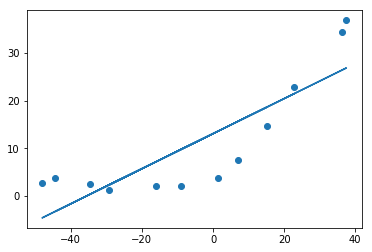

In [294]:
# =========== part 4: Train Linear Regression =================
# 因为只有一个特征，lamda=0，无需正则化
#  ------------------- 注意点：用未归一化的数据x1算得theta1和归一化数据x2算得theta2，np.dot(x1,theta) == np.dot(x2,theta2) ,即预测值是一样的------------------------
def descent(X, y, theta, m, alpha=0.001, thread=0.02, lamda=0 ):
    cost_lst = []
    iterations = 0
    k = 0
    total_samples = len(X)
    while True:
        iterations += 1
        cost = regularized_cost(theta, X, y, lamda, m)
        grad = regularized_grad(theta, X, y, lamda, m)
        cost_lst.append(cost)
        theta = theta - alpha * grad
#         if iterations == 5000: break
        if np.linalg.norm(grad) < thread: break
#         if cost < 0.057252: break
    return theta, cost

theta = np.zeros((2,1))
m = X.shape[0]
[theta, cost] = descent(X, y, theta, m )
plt.scatter(X[:,1:], y)
plt.plot(X[:,1], np.dot(X, theta))

Text(0, 0.5, 'error')

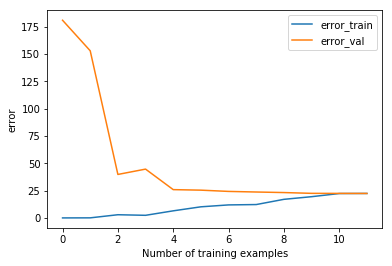

In [185]:
# ============== Part 5: Learning Curve for Linear Regression ===============
    #  ----- 计算方式：通过不同训练样本尺寸算出损失值最低的theta，再根据该theta算出验证集对应的损失值，下图为High-Bias
error_train = []
error_val = []
for i in range(1, len(X)+1):
    
    [theta, cost_train] =  descent(X[:i,:] ,y[:i,:], np.zeros((2,1)), m )
    error_train.append(cost_train)
    cost_val = regularized_cost(theta, X, y, 0, m)  # -------- 注意点：此时的验证集为全部数据，train不能为全部数据，结合part8看--------------
    error_val.append(cost_val)
plt.plot(np.arange(len(X)), error_train, label='error_train')
plt.plot(np.arange(len(X)), error_val, label='error_val')  
ax = plt.gca(); ax.legend(loc=1); ax.set_xlabel("Number of training examples"); ax.set_ylabel("error")

In [186]:
# =========== Part 6: Feature Mapping for Polynomial Regression =============
# ----------- 添加多项式--------------------------------
def poly_features(X, p):
    # 对单一特征多项式化，从而增加特征数量
    temp = X
    for i in range(2, p+1 ):
        X = np.concatenate((X, pow(temp, i)), axis=1)
    return X


In [187]:
def feature_normalize(X):
    # 对特征进行标准化处理   1：减去均值再除以特征最大最小值区间，u=0，std!=1非标准正态分布 ；
    # 2：减去均值再除以特征值的标准差 (本函数采用)，即标准正态分布
    mu = X_poly.mean(axis=0)
    X_norm = X_poly - mu
    sigma = X_poly.std(axis=0)
    X_norm = X_norm / sigma
    return X_norm, mu, sigma

In [359]:
p = 8
X_poly = poly_features(X[:,1:], p)
[X_poly, mu, sigma] = feature_normalize(X_poly)
X_poly = np.insert(X_poly, 0, 1, axis=1)
#  ------------- 注意：使用训练数据的mu和std，以保证val和test在同一个量纲。例：train-[1,11,12], test-[2,3,4]，如果test
# 按照自己内部mu和sigma归一化，则2,3,4都会被分到train中 [1]所在的类别
X_poly_test = poly_features(Xtest[:,1:], p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.insert(X_poly_test, 0, 1, axis=1)

X_poly_val = poly_features(Xval[:,1:], p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.insert(X_poly_val, 0, 1, axis=1)

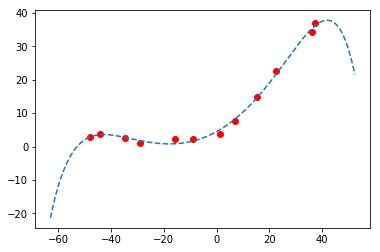

In [362]:
# =========== Part 7: Learning Curve for Polynomial Regression =============
[theta, cost_train] = descent(X_poly, y, np.zeros((p+1,1)) , m )
def plot_fit(X, size):
    # 画多项式拟合曲线，1、通过多项式数据获得theta 
    x_tmp = np.arange(X.min() - size,X.max()+size, 0.05) # 2、设定需要展示的横轴大小
    X_poly = poly_features(x_tmp.reshape(len(x_tmp),1), p) # 3、对新数据多项式归一化 
    X_poly = (X_poly - mu) / sigma
    X_poly = np.insert(X_poly, 0, 1, axis=1)
    plt.plot(x_tmp, np.dot(X_poly, theta), '--')  # ------------------ 4、注意点：横轴还是未归一化之前的数据，因为归一化后得到的theta与
    #  归一化的数据相乘 等于未归一化的数据与未归一化的theta相乘-------------
plt.scatter(X[:,1], y, color='r')
plot_fit(X[:,1:], 15)

Text(0, 0.5, 'error')

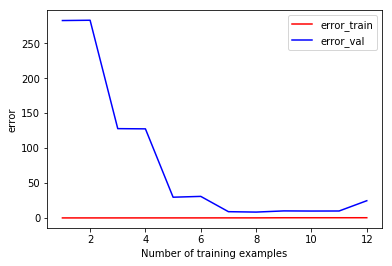

In [218]:
# ----------- 多项式的学习曲线 ----------------------------
lamda = 0
error_train = []; error_val = []
size = len(X_poly)
for i in range(1, size+1):
    [theta, cost_train] = descent(X_poly[:i,:], y[:i,:], np.zeros((p+1,1)) , m )
    cost_val = regularized_cost(theta, X_poly_val, yval, lamda, m)
    error_train.append(cost_train)
    error_val.append(cost_val)
#  如图所示出现“过拟合”，训练数据误差很小，但是验证数据的误差很大
plt.plot(np.arange(1, size+1), error_train, 'r', label='error_train')
plt.plot(np.arange(1, size+1), error_val, 'b', label='error_val')
ax = plt.gca(); ax.legend(loc=1); ax.set_xlabel("Number of training examples"); ax.set_ylabel("error")

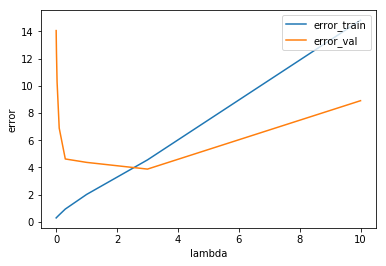

In [299]:
# =========== Part 8: Validation for Selecting Lambda =============
# 流程：遍历lamda得到对应train的损失值最小时的theta，将theta计算出val全集对应的损失值cost_val，找到cost_val最小时对应的lamda
def select_lambda(X_poly, y, X_poly_val, yval):
    lamda_lst = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]    
    error_train = []
    error_val = []
    for lamda in lamda_lst:
        [theta, cost_train] = descent(X_poly, y, np.zeros((p+1,1)) , len(X_poly), lamda=lamda) 
        cost_train = regularized_cost(theta, X_poly, y, 0, len(X_poly)) # -------- 注意点：此时train和val的lamda都为0，个人觉得train的lamda应该为动态lamda。结合part5看------------------------
        cost_val = regularized_cost(theta, X_poly_val, yval, 0, len(X_poly_val))    
        error_train.append(cost_train)
        error_val.append(cost_val)
    plt.plot(lamda_lst, error_train, label='error_train')
    plt.plot(lamda_lst, error_val, label='error_val')
    ax = plt.gca();ax.legend(loc=1);ax.set_xlabel("lambda"); ax.set_ylabel("error")
select_lambda(X_poly, y, X_poly_val, yval)
#  从图中看到最合适的lamda在3附近

In [297]:
# =========== Part 9: Computing test set error and Plotting learning curves with randomly selected examples=============
#  流程：根据part8得到的最合适lamda，用train得到对应的theta，用test测试该theta对应的cost_test
lamda = 3
[theta, cost_train] = descent(X_poly, y, np.zeros((p+1,1)) , len(X_poly), lamda=lamda )
cost_test = regularized_cost(theta, X_poly_test, ytest, 0, len(X_poly_test))
cost_val = regularized_cost(theta, X_poly_val, yval, 0, len(X_poly_val))

cost_test, cost_val

(3.5408572158356924, 3.8735156465215845)